In [1]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, edgeitems=10, linewidth=180, suppress=True)

Константы

In [2]:
D = 10  # Размер  сита
m = 100  # Число ячеек
a = D / m  # Ширина ячейки
b, k = 0.1, 0.1  # Наибольший размер частицы, соотношение сторон

Нахождение соcтояния частицы после "встряхивания"

In [3]:
def initialize_state(b=b, k=k, D=D):
    # Начальные координаты
    X0 = np.resize(
        np.append(np.random.uniform(0, D - b, size=2), 0),
        (3, 1))

    # Положение до вращения в относительной системе кооординат
    N0 = np.array([[ 0 ,  0 ,  0 ,  b , b,  b ],
                   [ 0 , k*b, k*b,  0 , 0, k*b],
                   [k*b, k*b,  0 , k*b, 0,  0 ]])

    # Углы поворота
    alpha, beta = np.random.uniform(0, np.pi/2, size=2)

    # Матрица поворота
    rotation_matrix = np.array([[        cos(beta)      ,      0    ,         sin(beta)      ],
                                [ sin(alpha) * sin(beta), cos(alpha), -sin(alpha) * cos(beta)], 
                                [-cos(alpha) * sin(beta), sin(alpha),  cos(alpha) * cos(beta)]])
    
    # Относительные координаты после вращения
    N1 = rotation_matrix @ N0

    # Положение вершин после вращения
    X1 = X0 + N1
    return X1

In [4]:
A = np.random.uniform(0, 10, size=(3, 6))
B = np.dstack((A[:2] // a).astype(int)).reshape(6, 2)
#print(A)
print(B)
unq, cnt = np.unique(B, axis=0, return_counts=True)
cnt

[[84 28]
 [62 99]
 [27 99]
 [30 85]
 [10 96]
 [33 14]]


array([1, 1, 1, 1, 1, 1], dtype=int64)

In [5]:
#Переименовать, напр. is_passing; здесь же определять, проходит ли частица сквозь сито
def count_intersections(state, a=a):
    # Нахождение номеров ячеек, куда проецируются 6 вершин
    cells_numbers = np.dstack((state[:2] // a).astype(int)).reshape(6, 2)

    # Список задействованных ячеек и число входящих в них вершин
    unique_cells, entries_count = np.unique(cells_numbers, axis=0, return_counts=True)
    
    # Максимальное количество точек, попавших в одну и ту же ячейку
    max_entries = entries_count.max()

    ''''''
    if max_entries >= 5:
        pass
        #return True
    
    if max_entries == 4:
        pass
        #return len(unique_cells) == 2
    
    if max_entries == 3:
        if len(unique_cells) == 2:
            return True
        


    return max_entries

In [6]:
S = initialize_state()
count_intersections(S)

3

(array([2, 3, 4, 5, 6], dtype=int64),
 array([ 14, 804,  25,  64,  93], dtype=int64))

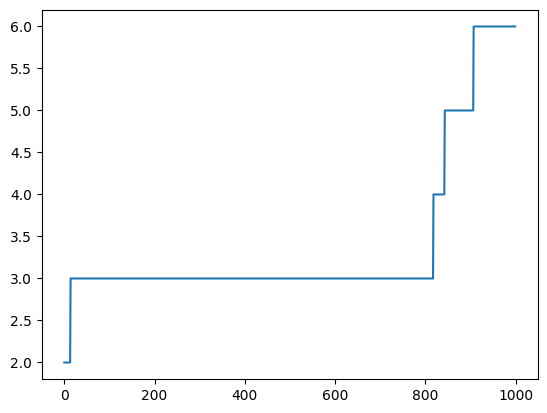

In [7]:
l = []
for _ in range(1000):
    S = initialize_state()
    l.append(count_intersections(S))

plt.plot(sorted(l))
np.unique(l, return_counts=True)